# Project 7 - Storytelling and Visualization of Baseball Data
This notebook will dive deeper into the data used in Project 4 - an MLB dataset of predictions. First we must clean the data. We will use 1920 to present data because there is missing information prior to that date and that will give us roughly 100 years.

* As a note, some visuals occasionally don't show when all cells are run. You may need to click run on the individual cell if it doesn't show the first time.

In [1]:
import numpy as np
import pandas as pd

original = pd.read_csv("../data/mlb_elo.csv")
original['date'] = pd.to_datetime(original['date'])
original.head(5)

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
0,2019-03-20,2019,1,NaN,OAK,SEA,1540.662576,1508.406103,0.546288,0.453712,...,50.867044,50.290116,15.661717,10.194364,0.549029,0.450971,1519.121831,1492.270839,7,9
1,2019-03-21,2019,1,NaN,OAK,SEA,1538.451430,1510.617249,0.539971,0.460029,...,45.343580,47.400000,-9.598335,-3.155546,0.529336,0.470664,1517.909603,1493.483066,4,5
2,2019-03-28,2019,0,NaN,SEA,BOS,1512.271027,1573.043870,0.447276,0.552724,...,49.933119,63.397135,8.367407,42.091505,0.390241,0.609759,1497.190808,1557.911878,12,4
3,2019-03-28,2019,0,NaN,KCR,CHW,1468.656479,1463.300808,0.542146,0.457854,...,52.699258,50.660505,19.069202,11.169670,0.540899,0.459101,1452.240404,1455.624562,5,3
4,2019-03-28,2019,0,NaN,SDP,SFG,1470.984750,1475.955269,0.527358,0.472642,...,46.892534,53.869991,-3.256612,19.563483,0.531354,0.468646,1485.613206,1464.712586,2,0


In [2]:
import warnings
warnings.filterwarnings('ignore')

trimmedDf = original[original.season >= 1920]
trimmedDf.drop(columns=['rating1_post', 'rating2_post', 'elo1_post', 'elo2_post'], inplace=True )
df = trimmedDf.copy()
df.head(5)

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1,pitcher2,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,score1,score2
0,2019-03-20,2019,1,NaN,OAK,SEA,1540.662576,1508.406103,0.546288,0.453712,...,Mike Fiers,Marco Gonzales,50.867044,50.290116,15.661717,10.194364,0.549029,0.450971,7,9
1,2019-03-21,2019,1,NaN,OAK,SEA,1538.451430,1510.617249,0.539971,0.460029,...,Marco Estrada,Yusei Kikuchi,45.343580,47.400000,-9.598335,-3.155546,0.529336,0.470664,4,5
2,2019-03-28,2019,0,NaN,SEA,BOS,1512.271027,1573.043870,0.447276,0.552724,...,Marco Gonzales,Chris Sale,49.933119,63.397135,8.367407,42.091505,0.390241,0.609759,12,4
3,2019-03-28,2019,0,NaN,KCR,CHW,1468.656479,1463.300808,0.542146,0.457854,...,Brad Keller,Carlos Rodon,52.699258,50.660505,19.069202,11.169670,0.540899,0.459101,5,3
4,2019-03-28,2019,0,NaN,SDP,SFG,1470.984750,1475.955269,0.527358,0.472642,...,Eric Lauer,Madison Bumgarner,46.892534,53.869991,-3.256612,19.563483,0.531354,0.468646,2,0


## Approach 1
First we will look at variation in the scores over the most recent season (2019). The following plot will show the average score for each date along with a 95% confidence interval, represented by the bands around the line. This is useful is you want to see where score outliers may exist or simply get a general idea of the range that most scores fall into. Of course, the 95% confidence interval could be modified to reflect a desired inquiry.

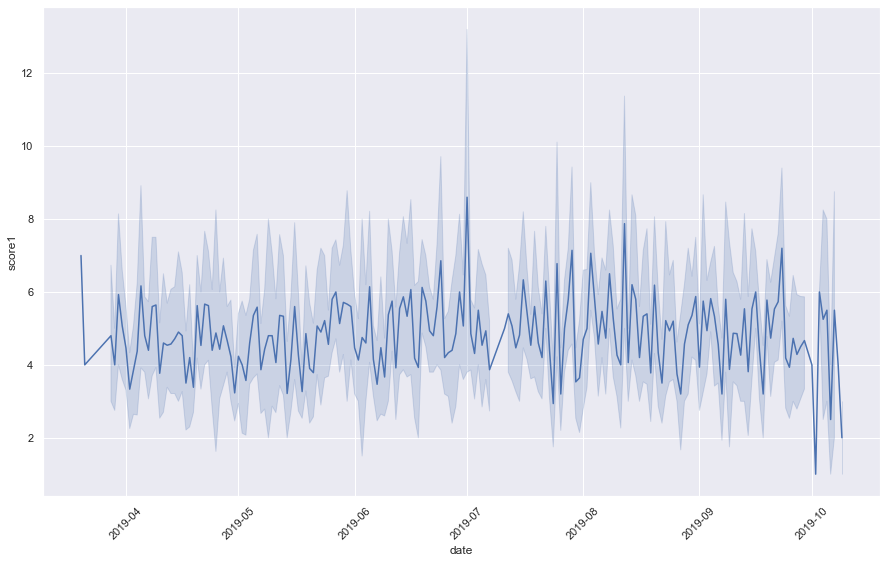

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

#only use 2019 data
sample = df[df['season'] > 2018]

fig, ax = plt.subplots(figsize=(15,9))
# Plot all scores over time
ax.set()
ax.tick_params(axis ='x', rotation = 45) 
sns.lineplot(x='date', y="score1",
#              hue="region", style="event",
             data=sample, palette = 'bright', ci=95, ax=ax)

#confidence interval at 95%


## Approach 2
One topic of consideration relates to a hypothesis revolving around increasing scores over time. There could be several reasons for this, namely ballparks getting smaller (Polo Fields used to be over 500ft, now parks average closer to 300ft) thus more homeruns are hit, additionally the rise of performance enhancing drugs could have notably increased the scores of games. We will look at the average score per season to see if there is a change over time.

In [4]:
#plot average score for each season
#group in decades

s1 = df[['season', 'score1']].copy()
s1.rename({'score1' : 'score'}, axis = 1, inplace=True)
s2 = df[['season', 'score2']].copy()
s2.rename({'score2' : 'score'},  axis = 1,inplace=True)
seasonalScores = pd.concat([s1, s2])

seasonalScores.head()

,season,score
0,2019,7
1,2019,4
2,2019,12
3,2019,5
4,2019,2


In [5]:
avgSeason = seasonalScores.groupby(by='season').mean()
avgSeason = avgSeason.reset_index()
avgSeason.tail()

,season,score
95,2015,4.251724
96,2016,4.466707
97,2017,4.641005
98,2018,4.442776
99,2019,4.825572


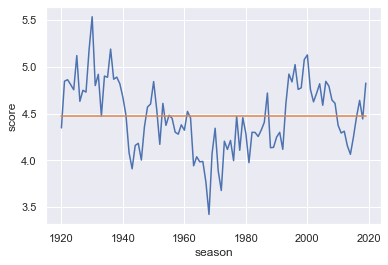

In [6]:
#sns.set(style="whitegrid")
#ax = sns.barplot(x='season', y="score", data=avgSeason)

sns.set(style="darkgrid")
sns.lineplot(x='season', y="score",
            
             data=avgSeason)#, palette = 'muted')
sns.lineplot(x='season', y=avgSeason['score'].mean(), data=avgSeason)

The graph shows my hypothesis was not necesarrily correct in the long run. However, it shows average score variation greater than 20% over the period. This is fairly substantial and I would like to hear a baseball analyst's perspective on the causes. The line at score = 4.5 represents the mean of all scores over the 100 years.

## Approach 3
The above visualizations were fairly simple, but conveyed meaningful ideas about the data. Now we will move to move complex visualizations. Below is a pair plot which graphs every variable from team 1 (arbitrarily chosen) against all others from the team, giving us a square matrix of plots of size n x n, where n is the number of features in the dataset. The purpose of this is to provide a high level look at any patterns that exist in the relationships between features. Additionally, the season is colored according to the key on the right hand side. This could potentially reveal significant variance over the long time period.

We've taken a random sample of 400 datapoints to plot starting in 1950 to present. Plotting all datapoints would be quite time consuming and could clutter the graphs.

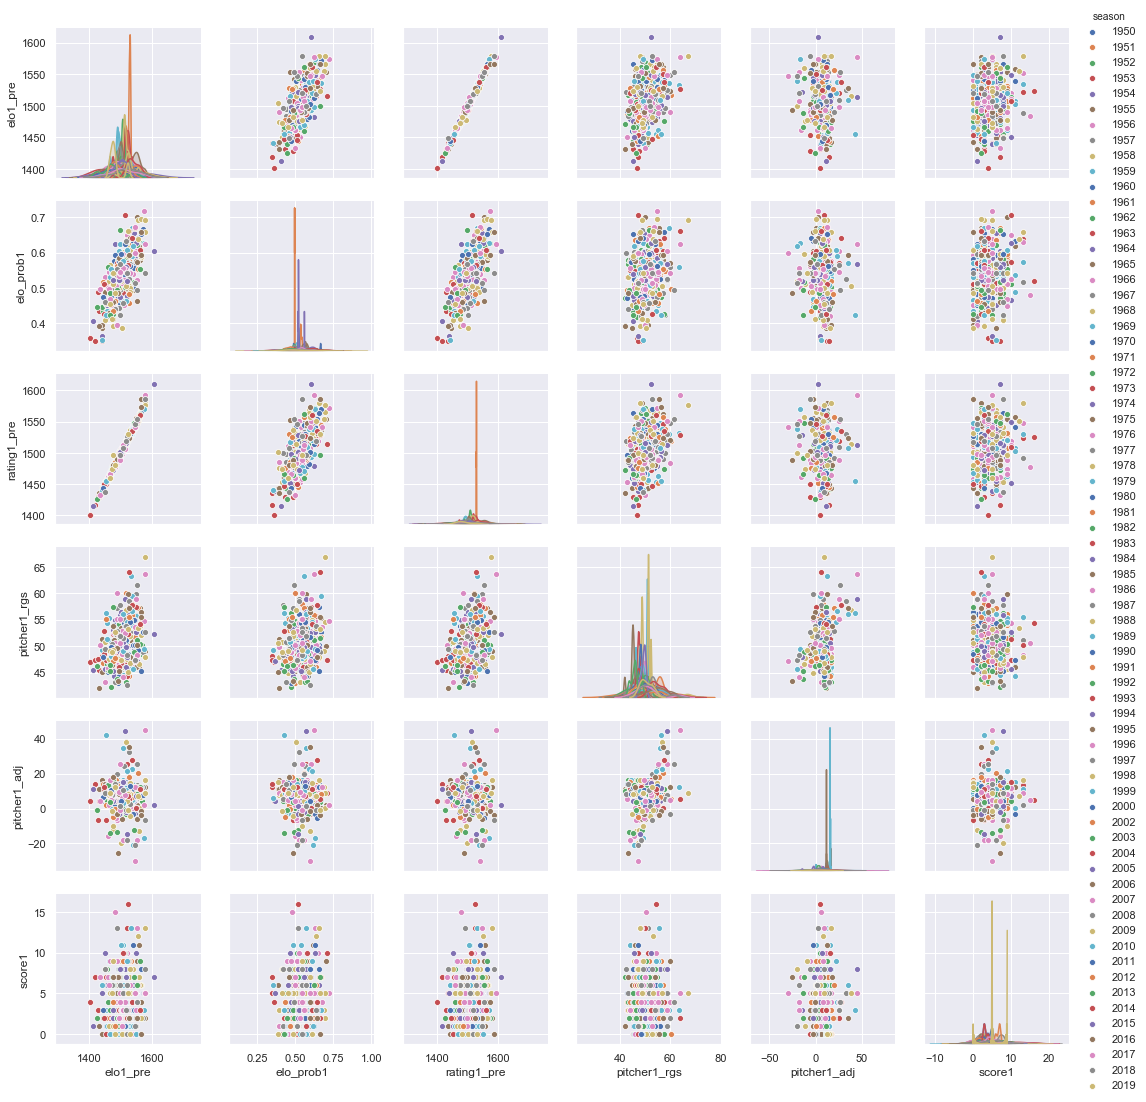

In [7]:
randomDf = df[df['season'] >=1950]
randomDf = randomDf.sample(400, random_state=11)

import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)

dfPairPlot = randomDf[['season', 'elo1_pre', 'elo_prob1', 'rating1_pre', 'pitcher1_rgs', 'pitcher1_adj', 'score1']]

dfPairPlot.head()
sns.pairplot(dfPairPlot, x_vars=['elo1_pre', 'elo_prob1', 'rating1_pre', 'pitcher1_rgs', 'pitcher1_adj', 'score1'],
             y_vars=['elo1_pre', 'elo_prob1', 'rating1_pre', 'pitcher1_rgs', 'pitcher1_adj', 'score1'],
             hue='season',
             palette = 'deep',
            )

Observe the corner from right to left is plotting each feature against itself, which is why its appearance differs from the others. We can see that there exist strong correlations between features that are similar, such as rating1_pre and elo1_pre, also pitcher1_adj and pitcher1_rgs. If the goal is to predict score, it would be instructive to look at the last column. Unfortunately, there doesn't appear to be any strong correlation, but this is a compelling visual to look for its existence.

## Approach 4
For the final visual, we will look at a heatmap. It will show the teams on the y axis and season on the x axis, starting in the 2010 season. The "heat" will be applied based on number of wins in a season. This visual enables recognition of the "hot" teams of this decade and is easy to see which team's have been fickle, possibly as a result of roster turnover. An extension would be to plot this alongside the number of starters that changed from the previous year to see if there is a correlation in performance, since hypothetically teams that have played together for a long time have learned to complement each other's strengths and weaknesses.

In [8]:
# prepare for heatmap of each team's wins each season since 2000
minYear = 2010
hm = trimmedDf[trimmedDf['season'] >=minYear].copy()

for index, x in hm.iterrows():
    if (x['score1'] > x['score2']):
        hm.at[index, 'winningTeam']= x['team1']
    else:
        hm.at[index, 'winningTeam']= x['team2']           

In [9]:
hm = hm[['season', 'winningTeam']]
hm.head()

teams = hm['winningTeam'].unique()
print("Team List: ")
print(teams)

teamWins = pd.DataFrame()

for i in teams:
    teamWins[i] = 0
    teamWins[i].astype('int')

    
for i in range (minYear,2019):
    for t in teams:
        temp = hm[hm['season'] == i].copy()
        temp2 = temp[temp['winningTeam'] == t].copy()
        teamWins.at[i, t] = len(temp2)
        
teamWins = teamWins.astype(int)
teamWins = teamWins.transpose()

teamWins.head()

Team List: 
['SEA' 'KCR' 'SDP' 'MIN' 'COL' 'CIN' 'OAK' 'CHC' 'HOU' 'LAD' 'DET' 'PHI'
 'MIL' 'NYM' 'NYY' 'BOS' 'ARI' 'ANA' 'STL' 'TBD' 'TOR' 'SFG' 'TEX' 'FLA'
 'CLE' 'BAL' 'CHW' 'WSN' 'PIT' 'ATL']


,2010,2011,2012,2013,2014,2015,2016,2017,2018
SEA,61,67,75,71,87,76,86,78,89
KCR,67,71,72,86,100,106,81,80,58
SDP,90,71,76,76,77,74,68,71,66
MIN,94,63,66,66,70,83,59,85,78
COL,83,73,64,74,66,68,75,87,92


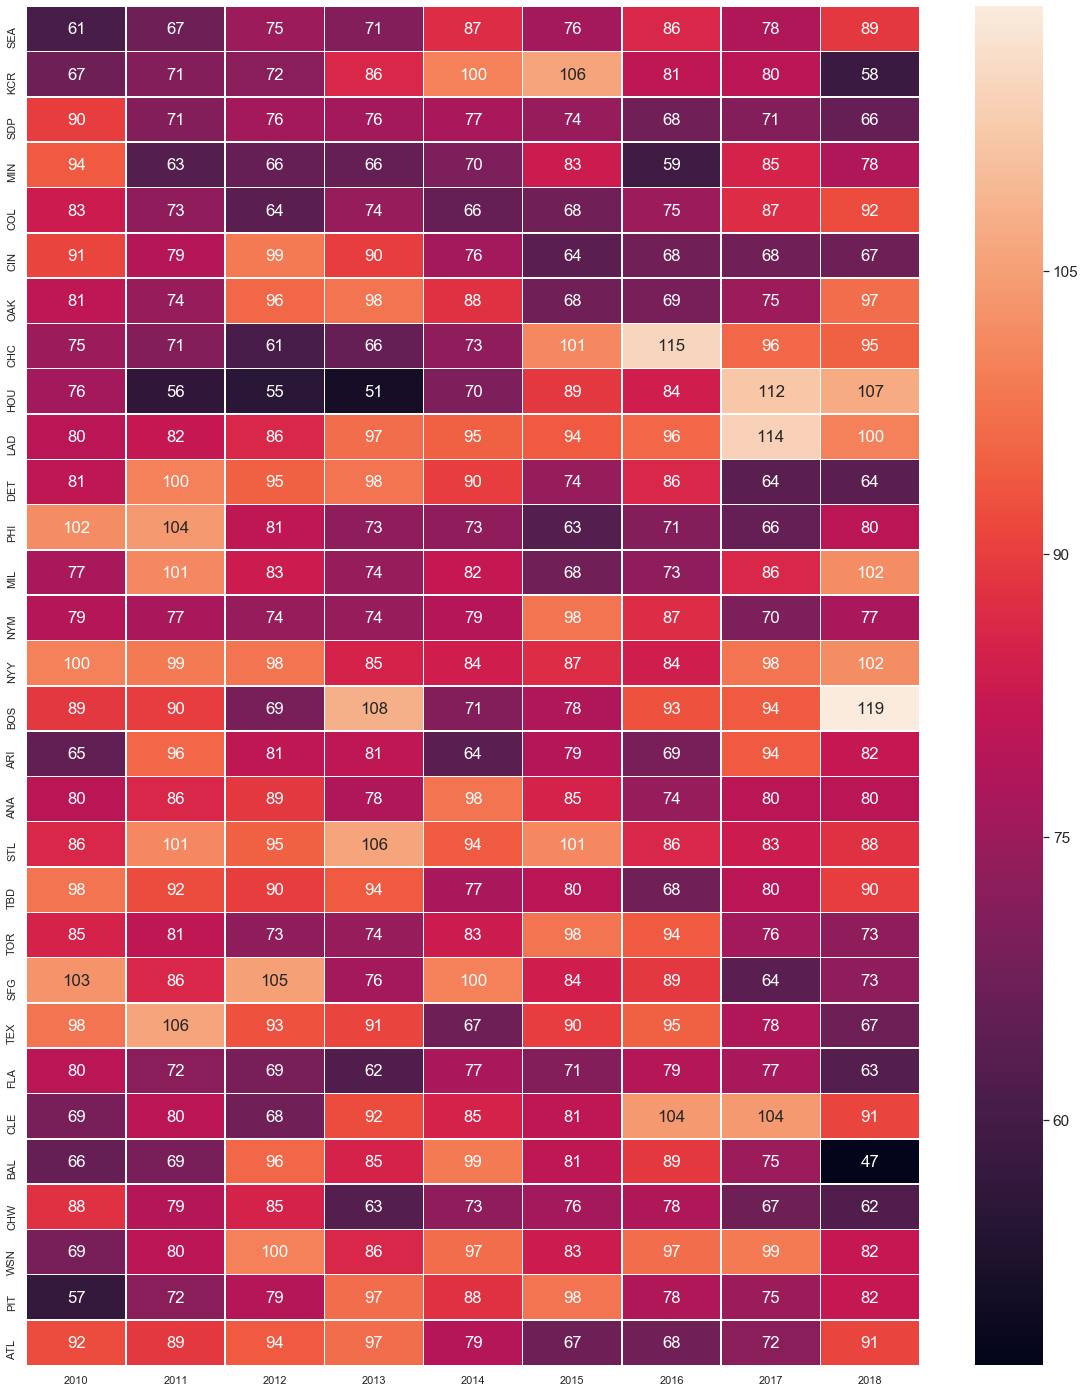

In [10]:
from pandas import DataFrame
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(20,25))
sns.set(font_scale=1.4)

#sns.set(y_label = 
sns.heatmap(teamWins, annot=True, linewidths=.5, fmt='g')

Not surprisingly, the New York Yankees have consistently red cells. They are arguably the best team in baseball over a long period, reflected by the quantity of World Championships they've won. One interesting observation is with the exception of the Houston Astros, most teams that have a bad season (69 wins or less) don't typically have that happen in consecutive seasons. This may be due to the firing and hiring of managers to try and instigate change in the clubhouse and on the field.